# ⚡ UK Historic Electricity Demand Analysis - Data Exploration

**Team Member(s)**: [Add your name here]  
**Objective**: Load and explore the UK Historic Electricity Demand dataset (2001-2025) to understand energy consumption patterns, seasonal trends, and grid dynamics.

## 📋 Overview
This notebook performs comprehensive analysis of the UK Historic Electricity Demand dataset containing 25 years of half-hourly electricity demand records. We'll examine demand patterns, renewable generation, interconnector flows, and seasonal variations.

---

## 🔍 **Step 1: Data Exploration and Quality Assessment**

### 1 📂 Initial Data Loading and Structure Analysis

**Purpose**: Load a sample from the electricity demand dataset to understand its structure, temporal resolution, and data quality.

**Key Questions**:
- What variables are available in the dataset?
- What is the temporal resolution and coverage?
- What does a typical electricity demand record look like?

In [17]:
# ======================================
# Step 1 — Load and Inspect UK Electricity Demand Data
# ======================================
# Objective:
# - Understand the multi-file structure (2001-2025)
# - Examine column structure and data types
# - Check temporal resolution and completeness
# ======================================

from pathlib import Path
import pandas as pd
import numpy as np
import glob
from datetime import datetime

# Path to electricity demand data directory
data_dir = Path("Dataset_2_UK_Historic_Electricity_Demand_Data/")

# ------------------------------------------------------------
# Discover all CSV files in the directory
# ------------------------------------------------------------
csv_files = list(data_dir.glob("demanddata_*.csv"))
csv_files.sort()

print(f"✅ Found {len(csv_files)} data files")
print("Years available:")
for file in csv_files:
    year = file.stem.split('_')[-1]
    print(f"  📅 {year}: {file.name}")

# ------------------------------------------------------------
# Load a sample file to understand structure
# ------------------------------------------------------------
sample_file = csv_files[10]  # Load 2011 as a representative sample
print(f"\n📂 Loading sample file: {sample_file.name}")

df_sample = pd.read_csv(sample_file)
print("✅ Sample loaded successfully.")
print("Shape:", df_sample.shape)  # (rows, columns)

print("\n🔍 Column names:")
for i, col in enumerate(df_sample.columns):
    print(f"  {i+1:2d}. {col}")

# Preview the first few rows
print(f"\n📋 First 5 rows:")
display(df_sample.head())

# ------------------------------------------------------------
# Inspect data types and basic statistics
# ------------------------------------------------------------
print("\n📊 DataFrame Info:")
df_sample.info()

print("\n💡 Basic Statistics:")
display(df_sample.describe())

# ------------------------------------------------------------
# Check for missing values
# ------------------------------------------------------------
print("\n❓ Missing Value Analysis:")
missing_pct = df_sample.isnull().sum() / len(df_sample) * 100
missing_analysis = pd.DataFrame({
    'Missing_Count': df_sample.isnull().sum(),
    'Missing_Percentage': missing_pct.round(2)
}).sort_values('Missing_Percentage', ascending=False)

print(missing_analysis[missing_analysis['Missing_Count'] > 0])

✅ Found 25 data files
Years available:
  📅 2001: demanddata_2001.csv
  📅 2002: demanddata_2002.csv
  📅 2003: demanddata_2003.csv
  📅 2004: demanddata_2004.csv
  📅 2005: demanddata_2005.csv
  📅 2006: demanddata_2006.csv
  📅 2007: demanddata_2007.csv
  📅 2008: demanddata_2008.csv
  📅 2009: demanddata_2009.csv
  📅 2010: demanddata_2010.csv
  📅 2011: demanddata_2011.csv
  📅 2012: demanddata_2012.csv
  📅 2013: demanddata_2013.csv
  📅 2014: demanddata_2014.csv
  📅 2015: demanddata_2015.csv
  📅 2016: demanddata_2016.csv
  📅 2017: demanddata_2017.csv
  📅 2018: demanddata_2018.csv
  📅 2019: demanddata_2019.csv
  📅 2020: demanddata_2020.csv
  📅 2021: demanddata_2021.csv
  📅 2022: demanddata_2022.csv
  📅 2023: demanddata_2023.csv
  📅 2024: demanddata_2024.csv
  📅 2025: demanddata_2025.csv

📂 Loading sample file: demanddata_2011.csv
✅ Sample loaded successfully.
Shape: (17520, 17)

🔍 Column names:
   1. SETTLEMENT_DATE
   2. SETTLEMENT_PERIOD
   3. ND
   4. TSD
   5. ENGLAND_WALES_DEMAND
   6. EMB

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW
0,01-JAN-2011,1,34606,35648,31058,484,1730,0,79,0,60,1939,0,0,-382,0,0
1,01-JAN-2011,2,35092,36089,31460,520,1730,0,79,0,16,1939,0,0,-381,0,0
2,01-JAN-2011,3,34725,36256,31109,520,1730,0,79,0,549,1989,0,0,-382,0,0
3,01-JAN-2011,4,33649,35628,30174,512,1730,0,79,0,998,1991,0,0,-381,0,0
4,01-JAN-2011,5,32644,34752,29253,512,1730,0,79,0,1126,1992,0,0,-382,0,0



📊 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   SETTLEMENT_DATE            17520 non-null  object
 1   SETTLEMENT_PERIOD          17520 non-null  int64 
 2   ND                         17520 non-null  int64 
 3   TSD                        17520 non-null  int64 
 4   ENGLAND_WALES_DEMAND       17520 non-null  int64 
 5   EMBEDDED_WIND_GENERATION   17520 non-null  int64 
 6   EMBEDDED_WIND_CAPACITY     17520 non-null  int64 
 7   EMBEDDED_SOLAR_GENERATION  17520 non-null  int64 
 8   EMBEDDED_SOLAR_CAPACITY    17520 non-null  int64 
 9   NON_BM_STOR                17520 non-null  int64 
 10  PUMP_STORAGE_PUMPING       17520 non-null  int64 
 11  IFA_FLOW                   17520 non-null  int64 
 12  IFA2_FLOW                  17520 non-null  int64 
 13  BRITNED_FLOW               17520 non-null 

,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.0,17520.000000,17520.000000,17520.0,17520.0
mean,24.500228,35149.928311,36487.917123,31768.103368,632.833733,1800.112329,17.834989,463.013584,7.278596,360.273916,542.691039,0.0,204.511416,-201.984418,0.0,0.0
std,13.854190,7604.560138,7426.489666,6948.036227,442.561488,44.935889,27.135015,350.842794,40.253581,585.539695,839.569511,0.0,487.969938,183.032303,0.0,0.0
min,1.000000,19347.000000,21281.000000,0.000000,0.000000,1730.000000,0.000000,79.000000,-21.000000,0.000000,-2056.000000,0.0,-1215.000000,-475.000000,0.0,0.0
25%,12.750000,29514.500000,30934.000000,26573.500000,274.000000,1761.000000,0.000000,132.000000,0.000000,8.000000,50.000000,0.0,0.000000,-411.000000,0.0,0.0
50%,24.500000,35332.000000,36511.500000,31941.500000,537.000000,1828.000000,2.000000,454.000000,0.000000,11.000000,815.000000,0.0,0.000000,-219.000000,0.0,0.0
75%,36.250000,40027.000000,41168.250000,36288.000000,950.000000,1844.000000,29.000000,716.000000,0.000000,719.000000,998.000000,0.0,537.000000,0.000000,0.0,0.0
max,50.000000,55113.000000,56177.000000,50047.000000,2110.000000,1846.000000,154.000000,1121.000000,611.000000,1979.000000,2001.000000,0.0,1143.000000,0.000000,0.0,0.0



❓ Missing Value Analysis:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []


---

## 🧹 **Step 2: Data Integration and Processing**

### 2.1 🔄 Multi-Year Data Loading and Consolidation

**Purpose**: Load and combine data from all available years (2001-2025) into a unified dataset for comprehensive analysis.

**Approach**: 
- Process each year's data with consistent schema
- Handle any structural changes over time
- Create a master dataset with temporal continuity

In [18]:
# ======================================
# Multi-Year Data Loading and Integration
# ======================================

def load_and_clean_electricity_data(data_dir, years_subset=None):
    """
    Load and clean electricity demand data from multiple CSV files
    
    Parameters:
    - data_dir: Path to directory containing CSV files
    - years_subset: List of years to load (None for all years)
    
    Returns:
    - Combined DataFrame with all years
    """
    
    # Find all CSV files
    csv_files = list(data_dir.glob("demanddata_*.csv"))
    csv_files.sort()
    
    # Filter by years if specified
    if years_subset:
        filtered_files = []
        for file in csv_files:
            year = int(file.stem.split('_')[-1])
            if year in years_subset:
                filtered_files.append(file)
        csv_files = filtered_files
    
    print(f"📂 Loading data from {len(csv_files)} files...")
    
    all_dataframes = []
    
    for i, file in enumerate(csv_files):
        try:
            year = file.stem.split('_')[-1]
            print(f"  Loading {year}... ", end="")
            
            # Load data
            df_year = pd.read_csv(file)
            
            # Add year column
            df_year['YEAR'] = int(year)
            
            # Parse settlement date
            df_year['SETTLEMENT_DATE'] = pd.to_datetime(df_year['SETTLEMENT_DATE'], format='%d-%b-%Y')
            
            # Create full datetime
            df_year['DATETIME'] = (df_year['SETTLEMENT_DATE'] + 
                                  pd.Timedelta(minutes=30) * (df_year['SETTLEMENT_PERIOD'] - 1))
            
            # Add temporal features
            df_year['MONTH'] = df_year['DATETIME'].dt.month
            df_year['DAY_OF_WEEK'] = df_year['DATETIME'].dt.dayofweek
            df_year['HOUR'] = df_year['DATETIME'].dt.hour
            df_year['MINUTE'] = df_year['DATETIME'].dt.minute
            df_year['SEASON'] = df_year['MONTH'].map({
                12: 'Winter', 1: 'Winter', 2: 'Winter',
                3: 'Spring', 4: 'Spring', 5: 'Spring',
                6: 'Summer', 7: 'Summer', 8: 'Summer',
                9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
            })
            
            all_dataframes.append(df_year)
            print(f"{len(df_year):,} records")
            
        except Exception as e:
            print(f"Error loading {file}: {e}")
            continue
    
    if all_dataframes:
        # Combine all years
        df_combined = pd.concat(all_dataframes, ignore_index=True)
        df_combined = df_combined.sort_values(['DATETIME']).reset_index(drop=True)
        
        print(f"\n✅ Successfully loaded {len(df_combined):,} records")
        print(f"📅 Date range: {df_combined['DATETIME'].min()} to {df_combined['DATETIME'].max()}")
        print(f"📊 Years: {sorted(df_combined['YEAR'].unique())}")
        
        return df_combined
    else:
        print("❌ No data loaded successfully")
        return None

# Load a subset of recent years for initial analysis (to avoid memory issues)
recent_years = [2020, 2021, 2022, 2023, 2024]  # 5 years of recent data

print("Loading recent years for analysis...")
df_electricity = load_and_clean_electricity_data(data_dir, years_subset=recent_years)

if df_electricity is not None:
    # Display basic info about the combined dataset
    print(f"\n📋 COMBINED DATASET INFO:")
    print(f"Shape: {df_electricity.shape}")
    print(f"Memory usage: {df_electricity.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    # Save processed data
    output_path = Path("data/interim/electricity_demand_processed.csv")
    output_path.parent.mkdir(parents=True, exist_ok=True)
    df_electricity.to_csv(output_path, index=False)
    print(f"💾 Saved processed data to {output_path}")
    
    # Show sample of processed data
    print(f"\n📋 PROCESSED DATA SAMPLE:")
    display(df_electricity.head(10))

Loading recent years for analysis...
📂 Loading data from 5 files...
  Loading 2020... 17,568 records
  Loading 2021... 17,520 records
  Loading 2022... 17,520 records
  Loading 2023... Error loading Dataset_2_UK_Historic_Electricity_Demand_Data/demanddata_2023.csv: time data "01-Jan-23" doesn't match format "%d-%b-%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
  Loading 2024... 17,568 records

✅ Successfully loaded 70,176 records
📅 Date range: 2020-01-01 00:00:00 to 2024-12-31 23:30:00
📊 Years: [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2024)]

📋 COMBINED DATASET INFO:
Shape: (70176, 29)
Memory usage: 18.1 MB
17,568 records

✅ Successfully loaded 70,176 recor

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,VIKING_FLOW,GREENLINK_FLOW,YEAR,DATETIME,MONTH,DAY_OF_WEEK,HOUR,MINUTE,SEASON,SCOTTISH_TRANSFER
0,2020-01-01,1,26340,27153,23821,1073,6465,0,13040,0,...,0,0,2020,2020-01-01 00:00:00,1,2,0,0,Winter,NaN
1,2020-01-01,2,26921,27684,24393,1020,6465,0,13040,0,...,0,0,2020,2020-01-01 00:30:00,1,2,0,30,Winter,NaN
2,2020-01-01,3,26569,27240,24085,1010,6465,0,13040,0,...,0,0,2020,2020-01-01 01:00:00,1,2,1,0,Winter,NaN
3,2020-01-01,4,25754,26435,23350,1043,6465,0,13040,0,...,0,0,2020,2020-01-01 01:30:00,1,2,1,30,Winter,NaN
4,2020-01-01,5,25075,25824,22788,1001,6465,0,13040,0,...,0,0,2020,2020-01-01 02:00:00,1,2,2,0,Winter,NaN
5,2020-01-01,6,24468,25542,22212,985,6465,0,13040,0,...,0,0,2020,2020-01-01 02:30:00,1,2,2,30,Winter,NaN
6,2020-01-01,7,23724,25226,21455,964,6465,0,13040,0,...,0,0,2020,2020-01-01 03:00:00,1,2,3,0,Winter,NaN
7,2020-01-01,8,23041,24573,20859,967,6465,0,13040,0,...,0,0,2020,2020-01-01 03:30:00,1,2,3,30,Winter,NaN
8,2020-01-01,9,22537,23822,20472,975,6465,0,13040,0,...,0,0,2020,2020-01-01 04:00:00,1,2,4,0,Winter,NaN
9,2020-01-01,10,22322,23898,20314,1016,6465,0,13040,0,...,0,0,2020,2020-01-01 04:30:00,1,2,4,30,Winter,NaN


## 📊 **Step 3: Electricity Demand Analysis & Visualizations**

### 3.1 📚 Visualization Setup

**Purpose**: Import libraries and prepare the processed electricity demand data for comprehensive visualization and analysis.

In [19]:
# ======================================
# Visualization Setup for Electricity Data
# ======================================

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting styles
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

print("✅ Visualization libraries imported")

# Load processed data if not already in memory
if 'df_electricity' not in locals():
    print("📂 Loading processed electricity data...")
    processed_path = Path("data/interim/electricity_demand_processed.csv")
    if processed_path.exists():
        df_electricity = pd.read_csv(processed_path)
        df_electricity['DATETIME'] = pd.to_datetime(df_electricity['DATETIME'])
        df_electricity['SETTLEMENT_DATE'] = pd.to_datetime(df_electricity['SETTLEMENT_DATE'])
        print(f"✅ Loaded {len(df_electricity):,} records")
    else:
        print("❌ Processed data not found. Please run the data loading cell first.")

if 'df_electricity' in locals():
    print(f"📊 Ready for analysis with {len(df_electricity):,} electricity records")
    print(f"📅 Date range: {df_electricity['DATETIME'].min()} to {df_electricity['DATETIME'].max()}")
    print(f"⚡ Peak demand: {df_electricity['ND'].max():,.0f} MW")
    print(f"⚡ Minimum demand: {df_electricity['ND'].min():,.0f} MW")

✅ Visualization libraries imported
📊 Ready for analysis with 70,176 electricity records
📅 Date range: 2020-01-01 00:00:00 to 2024-12-31 23:30:00
⚡ Peak demand: 46,433 MW
⚡ Minimum demand: 13,367 MW


### 3.2 📈 Electricity Demand Patterns Analysis

**Purpose**: Analyze electricity demand patterns across different time scales - daily, weekly, seasonal, and annual trends.

Running demand analysis on df_electricity...
📋 Electricity demand summary
• Data range: 2020-01-01 00:00:00 to 2024-12-31 23:30:00
• Records: 70,176
• Demand column used: ND

Annual summary (mean / peak / min):


,mean,max,min
YEAR,,,
2020,27156.5,45986,13367
2021,28345.3,46433,16309
2022,26622.3,46147,14879
2024,26286.8,45202,15071


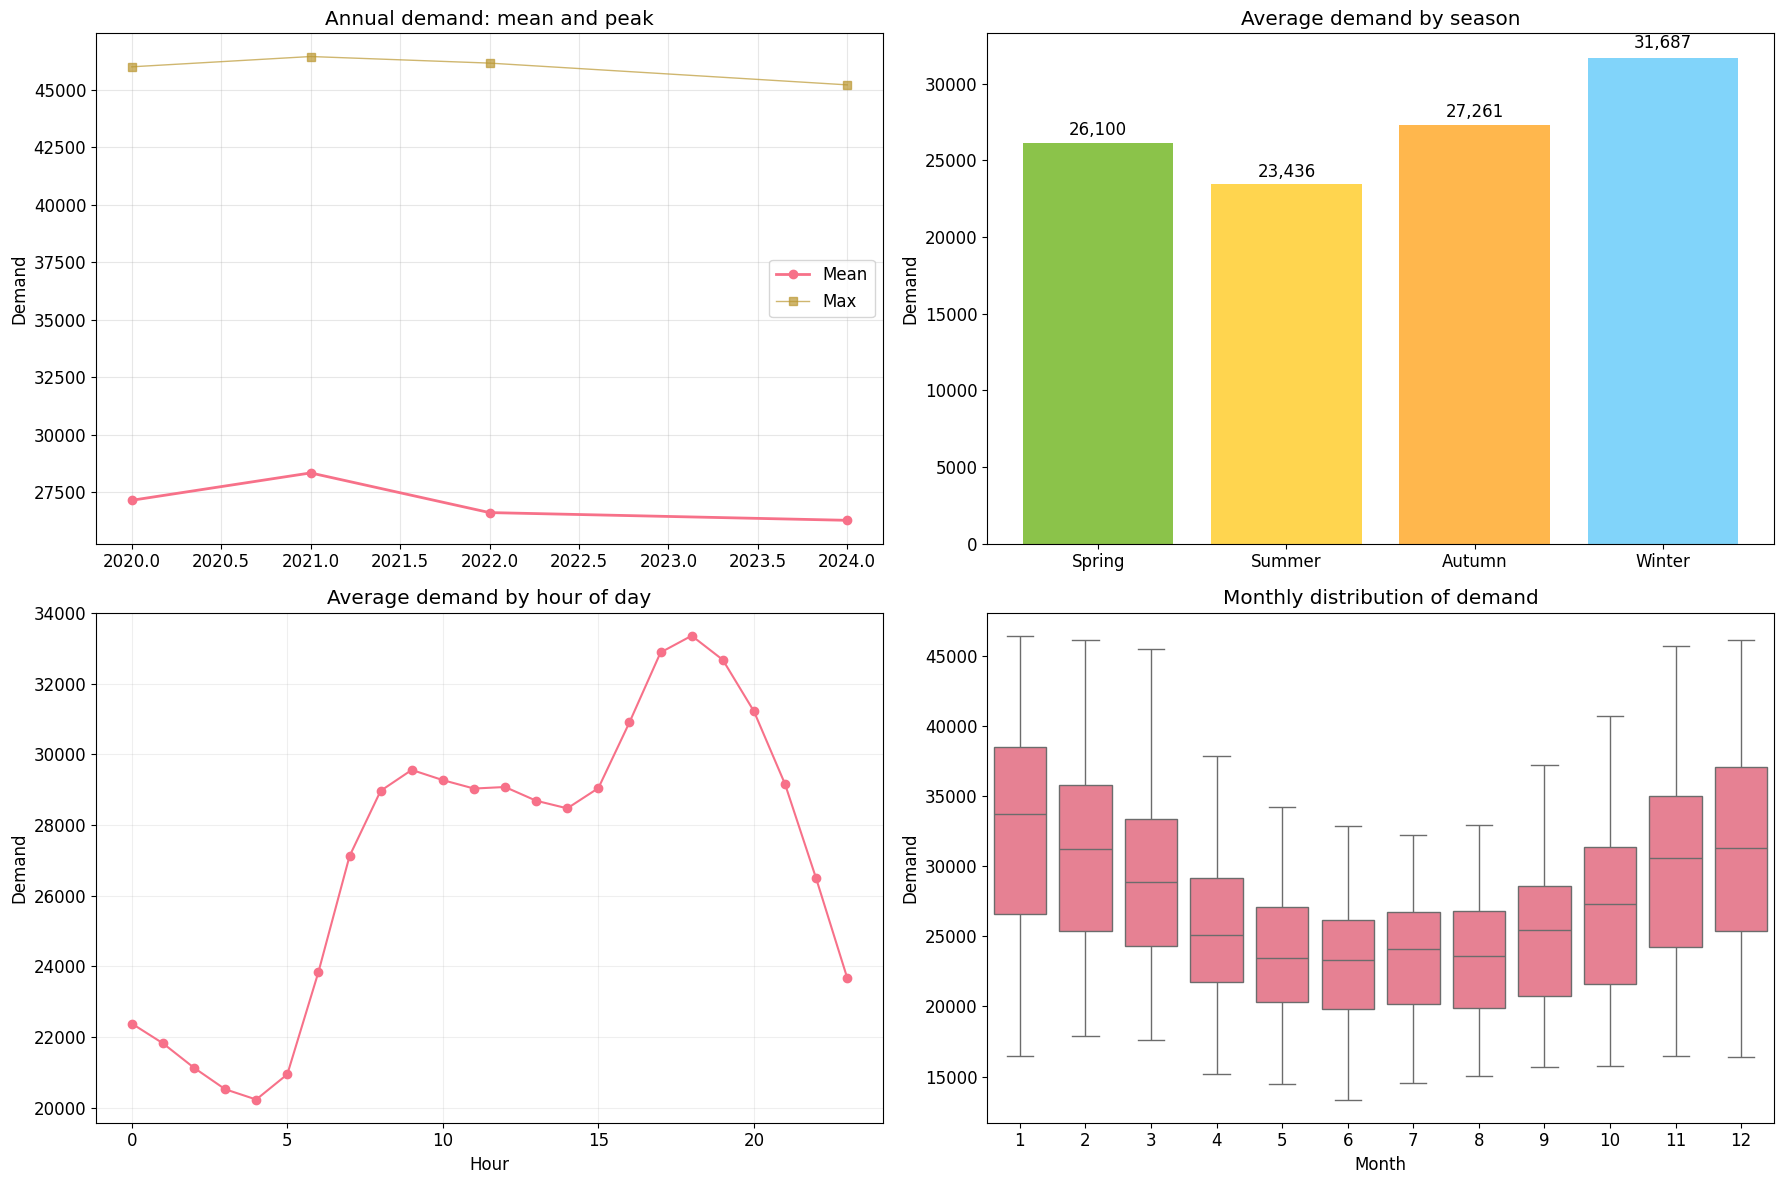

Done.


In [16]:
# ======================================
# Comprehensive Electricity Demand Patterns Analysis
# ======================================

def create_demand_analysis(df):
    """Create a defensive, readable electricity demand analysis summary and plots.
    This function checks for common columns, derives temporal features if missing,
    prints concise summary statistics and renders a small set of diagnostic plots."""

    # Defensive column detection for the demand column (ND is preferred)
    demand_col = None
    if 'ND' in df.columns:
        demand_col = 'ND'
    else:
        # try to find a column with 'demand' or 'load' in its name (case-insensitive)
        for c in df.columns:
            if 'demand' in c.lower() or 'load' in c.lower() or c.lower().endswith('_mw'):
                demand_col = c
                break

    if demand_col is None:
        print('❌ Could not find a demand column (ND or similar). Available columns:')
        print(list(df.columns))
        return

    # Ensure DATETIME exists and temporal features are present
    if 'DATETIME' not in df.columns:
        # try to construct from SETTLEMENT_DATE + SETTLEMENT_PERIOD if present
        if 'SETTLEMENT_DATE' in df.columns and 'SETTLEMENT_PERIOD' in df.columns:
            df['SETTLEMENT_DATE'] = pd.to_datetime(df['SETTLEMENT_DATE'], errors='coerce')
            df['DATETIME'] = df['SETTLEMENT_DATE'] + pd.to_timedelta((df['SETTLEMENT_PERIOD'] - 1) * 30, unit='m')
        else:
            print('❌ No DATETIME and no SETTLEMENT_DATE/SETTLEMENT_PERIOD to build it from.')
            return
    else:
        df['DATETIME'] = pd.to_datetime(df['DATETIME'], errors='coerce')

    # YEAR, MONTH, HOUR, DAY_OF_WEEK
    if 'YEAR' not in df.columns:
        df['YEAR'] = df['DATETIME'].dt.year
    if 'MONTH' not in df.columns:
        df['MONTH'] = df['DATETIME'].dt.month
    if 'HOUR' not in df.columns:
        df['HOUR'] = df['DATETIME'].dt.hour
    if 'DAY_OF_WEEK' not in df.columns:
        df['DAY_OF_WEEK'] = df['DATETIME'].dt.dayofweek
    if 'SEASON' not in df.columns:
        df['SEASON'] = df['MONTH'].map({
            12: 'Winter', 1: 'Winter', 2: 'Winter',
            3: 'Spring', 4: 'Spring', 5: 'Spring',
            6: 'Summer', 7: 'Summer', 8: 'Summer',
            9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
        })

    # Print concise numeric summaries
    print('📋 Electricity demand summary')
    # use DATETIME column for range (already coerced above); guard if it's all NaT
    data_min = df['DATETIME'].min() if 'DATETIME' in df.columns else None
    data_max = df['DATETIME'].max() if 'DATETIME' in df.columns else None
    print(f'• Data range: {data_min} to {data_max}')
    print(f'• Records: {len(df):,}')
    print(f'• Demand column used: {demand_col}')
    print('')
    print('Annual summary (mean / peak / min):')
    annual = df.groupby('YEAR')[demand_col].agg(['mean', 'max', 'min']).round(1)
    display(annual)

    # Simple plots: annual trend, seasonal bars, hourly average, monthly boxplot
    fig = plt.figure(figsize=(18, 12))

    # Annual trend
    ax1 = plt.subplot(2, 2, 1)
    annual_stats = annual
    ax1.plot(annual_stats.index, annual_stats['mean'], marker='o', lw=2, label='Mean')
    ax1.plot(annual_stats.index, annual_stats['max'], marker='s', lw=1, label='Max', alpha=0.7)
    ax1.set_title('Annual demand: mean and peak')
    ax1.set_ylabel('Demand')
    ax1.legend()
    ax1.grid(alpha=0.3)

    # Seasonal bars
    ax2 = plt.subplot(2, 2, 2)
    seasonal_order = ['Spring', 'Summer', 'Autumn', 'Winter']
    seasonal_avg = df.groupby('SEASON')[demand_col].mean().reindex(seasonal_order).fillna(0)
    bars = ax2.bar(seasonal_avg.index, seasonal_avg.values, color=['#8BC34A', '#FFD54F', '#FFB74D', '#81D4FA'])
    ax2.set_title('Average demand by season')
    for bar in bars:
        h = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., h + max(1, h*0.02), f'{h:,.0f}', ha='center')
    ax2.set_ylabel('Demand')

    # Hourly average
    ax3 = plt.subplot(2, 2, 3)
    hourly = df.groupby('HOUR')[demand_col].mean()
    hourly.plot(kind='line', marker='o', ax=ax3)
    ax3.set_title('Average demand by hour of day')
    ax3.set_xlabel('Hour')
    ax3.set_ylabel('Demand')
    ax3.grid(alpha=0.2)

    # Monthly distribution boxplot (month numbers to labels)
    ax4 = plt.subplot(2, 2, 4)
    # prepare data for boxplot: group by month
    df_box = df[[demand_col, 'MONTH']].dropna()
    sns.boxplot(x='MONTH', y=demand_col, data=df_box, ax=ax4)
    ax4.set_title('Monthly distribution of demand')
    ax4.set_xlabel('Month')
    ax4.set_ylabel('Demand')

    plt.tight_layout()
    plt.show()

    # Return a small dict of summaries in case the caller wants programmatic access
    return { 'demand_col': demand_col, 'annual': annual, 'seasonal_avg': seasonal_avg, 'hourly': hourly }

# If the processed DataFrame is available, run the analysis automatically
if 'df_electricity' in locals():
    print('Running demand analysis on df_electricity...')
    _analysis = create_demand_analysis(df_electricity)
    print('Done.')
